## Overview
The purpose of this capstone project is to explore machine learning in image recognition. I have created a game that allows users to analyze there drawings using a webcam.  The Data Sets were not included in files because after compression, it still exceeded the ammount allowed through synpase.

There our 4 sections to this Project.

1. __Exploring the Data__
2. Logistic Regression
3. CNN
4. Building Test Functions

In this section, I take a preliminary look at what is in the dataset that I found

## Loading the dataset

The data set comes from: https://github.com/googlecreativelab/quickdraw-dataset


In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
#get path names
path = r'/Users/john/Desktop/Demo_Day/Data/npy'
file_names = sorted(glob.glob(path +'/*.npy'))
file_names 


['/Users/john/Desktop/Demo_Day/Data/npy/full_numpy_bitmap_angel.npy',
 '/Users/john/Desktop/Demo_Day/Data/npy/full_numpy_bitmap_sword.npy',
 '/Users/john/Desktop/Demo_Day/Data/npy/full_numpy_bitmap_wine_glass.npy',
 '/Users/john/Desktop/Demo_Day/Data/npy/full_numpy_bitmap_yoga.npy']

In [3]:
#Get the Names of the classes
sketch_list = []
for path in file_names:
    name = (path[56:path.find('.')])
    sketch_list.append(name)
sketch_list


['angel', 'sword', 'wine_glass', 'yoga']

In [4]:
#load npy sketch files
for i in range(len(file_names)):
    print('Number of images in ' +sketch_list[i] +':' +str(len(np.load(file_names[i]))))

Number of images in angel:149736
Number of images in sword:123802
Number of images in wine_glass:132302
Number of images in yoga:280442


In [5]:
#load npy sketch files the first 120000 images in each set
X = np.load(file_names[0])[:120000,:]
y = []
for i in range(X.shape[0]):
    y.append(0)
count = 1

for i in range(1,len(file_names)):
    X = np.concatenate((X,np.load(file_names[i])[:120000,:]))
    for j in range(np.load(file_names[i])[:120000,:].shape[0]):
        y.append(count)
    count +=1

In [6]:
#viewing the first image and looking at the values
print(type(X[0]))
print((X[0].shape))
X[0]


<class 'numpy.ndarray'>
(784,)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  16, 199, 246, 223, 151,   4,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  46, 255, 254, 254, 255, 133,
         0,   0,   0,   0,  10,  47,  32,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  41, 117,  60,   0,   0,  43, 255, 22

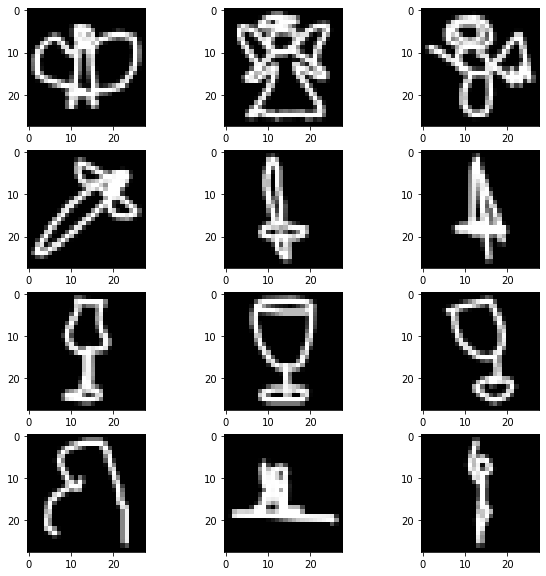

In [7]:
#Display the first 3 photos in the 4 categories ['angel', 'sword', 'wine_glass', 'yoga']
plt.subplots(4,3, figsize = (10,10))
count = 1
for i in range(4):
    for j in range(3):
        plt.subplot(4,3,count)
        k = i*120000 + j
        plt.imshow(X[k].reshape(28,28), cmap = 'gray')
        count+=1
plt.show()

## Summary
We know that each array has a shape of (784,) and is a numpy.array

The images are 28 pixels by 28 pixels. They usually have a minimum one pixel padding on each edge. 

Typically, a pixel value of 0 = Black and 255 = White.